In [ ]:
import numpy as np

In [ ]:
inp=np.array([[0,0],[0,1],[1,0],[1,1]])

In [ ]:
out=np.array([0,0,0,1])
out2=np.array([0,1,1,0])

In [ ]:
w=np.array([10,0.2])
b=-0.75
alpha=0.05
ietr=1000

thr=0.002

In [ ]:
print("w1:",w[0],"w2:",w[1],"learningrate:",alpha,"bias:",b)

w1: 10.0 w2: 0.2 learningrate: 0.05 bias: -0.75


In [ ]:
sse=0

A1

In [ ]:
def step(sum):
  if sum>0:
    return 1
  else:
    return 0


In [ ]:
 epoch_errors=[]
for j in range(0,1000):
  gdelta=0
  sse=0
  print("Ietration",j+1)
  for i in range(len(inp)):
    actual=out[i]
    sum1=w[0]*inp[i][0]+w[1]*inp[i][1]+b
    print(sum1)
    pred=step(sum1)
    err=actual-pred
    sse += err**2
    print("actual:",actual,"pred:",pred,"err:",err)
    for k in range(0,2):
      w[k]=w[k]+err*inp[i][k]*alpha
    b=b+err*alpha
  epoch_errors.append(sse)
  print("Epoch", j + 1, "Error:", gdelta)
  if sse<=thr:
    break;

Ietration 1
-0.75
actual: 0 pred: 0 err: 0
-0.55
actual: 0 pred: 0 err: 0
9.25
actual: 0 pred: 1 err: -1
9.349999999999998
actual: 1 pred: 1 err: 0
Epoch 1 Error: 0
Ietration 2
-0.8
actual: 0 pred: 0 err: 0
-0.6000000000000001
actual: 0 pred: 0 err: 0
9.149999999999999
actual: 0 pred: 1 err: -1
9.249999999999998
actual: 1 pred: 1 err: 0
Epoch 2 Error: 0
Ietration 3
-0.8500000000000001
actual: 0 pred: 0 err: 0
-0.6500000000000001
actual: 0 pred: 0 err: 0
9.049999999999999
actual: 0 pred: 1 err: -1
9.149999999999997
actual: 1 pred: 1 err: 0
Epoch 3 Error: 0
Ietration 4
-0.9000000000000001
actual: 0 pred: 0 err: 0
-0.7000000000000002
actual: 0 pred: 0 err: 0
8.949999999999998
actual: 0 pred: 1 err: -1
9.049999999999997
actual: 1 pred: 1 err: 0
Epoch 4 Error: 0
Ietration 5
-0.9500000000000002
actual: 0 pred: 0 err: 0
-0.7500000000000002
actual: 0 pred: 0 err: 0
8.849999999999998
actual: 0 pred: 1 err: -1
8.949999999999996
actual: 1 pred: 1 err: 0
Epoch 5 Error: 0
Ietration 6
-1.00000000000

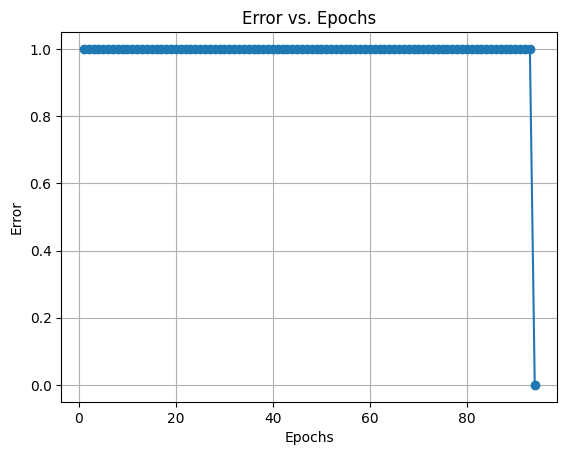

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(epoch_errors) + 1), epoch_errors, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.grid(True)
plt.show()

In [ ]:
if  sse > thr:
    print("Convergence not reached after", ietr, "epochs.")
else:
    print("Convergence reached in", j + 1, "epochs.")

Convergence reached in 94 epochs.


A2

In [ ]:
def bipolar_step(x):
    return -1 if x < 0 else 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

In [ ]:
w=np.array([10,0.2])
b=-0.75
alpha=0.05
ietr=1000

thr=0.002

Bi-Polar Step did not converge after 1000 iterations
Sigmoid did not converge after 1000 iterations
ReLU converged at iteration 167


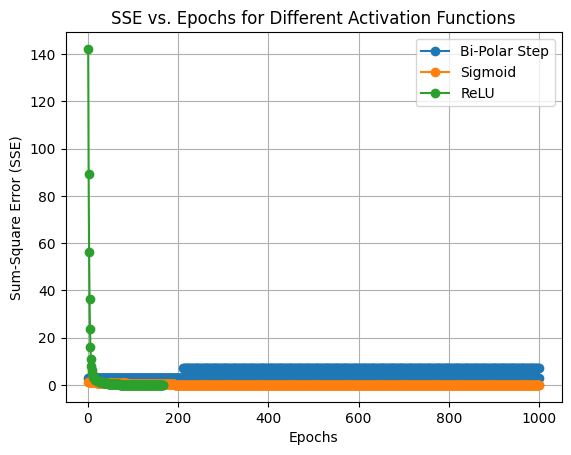

In [ ]:
activation_functions = {
    "Bi-Polar Step": bipolar_step,
    "Sigmoid": sigmoid,
    "ReLU": relu
}

for activation_name, activation_func in activation_functions.items():
    w=np.array([10,0.2])
    b=-0.75
    epoch_errors = []  # Store SSE values after each epoch
    convergence_achieved = False

    for epoch in range(1000):
        sse = 0

        for i in range(len(inp)):
            actual = out[i]
            sum1 = np.dot(w, inp[i]) + b
            pred = activation_func(sum1)
            err = actual - pred
            sse += err**2

            for k in range(2):
                w[k] += err * inp[i][k] * alpha
            b += err * alpha

        epoch_errors.append(sse)

        if sse <= thr:
          convergence_achieved = True
          print(f"{activation_name} converged at iteration {epoch + 1}")
          break
    if not convergence_achieved:
        print(f"{activation_name} did not converge after 1000 iterations")

    # Plotting the SSE values against epochs for each activation function
    plt.plot(range(1, len(epoch_errors) + 1), epoch_errors, marker='o', linestyle='-', label=activation_name)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error (SSE)')
plt.title('SSE vs. Epochs for Different Activation Functions')
plt.grid(True)
plt.legend()
plt.show()


A3

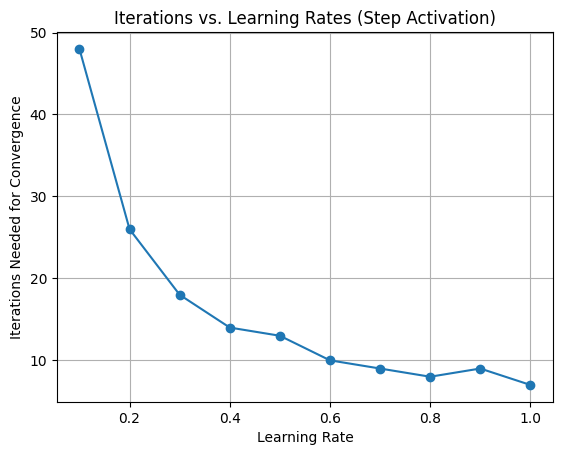

In [ ]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
error_threshold = 0.002
max_epochs = 1000

iterations_needed = []  # Store the number of iterations needed for each learning rate

for alpha in learning_rates:
    w=np.array([10,0.2])
    b=-0.75
    epoch_errors = []  # Store SSE values after each epoch
    convergence_achieved = False

    for epoch in range(max_epochs):
        sse = 0

        for i in range(len(inp)):
            actual = out[i]
            sum1 = np.dot(w, inp[i]) + b
            pred = step(sum1)
            err = actual - pred
            sse += err**2

            for k in range(2):
                w[k] += err * inp[i][k] * alpha
            b += err * alpha

        epoch_errors.append(sse)

        if sse <= error_threshold:
            convergence_achieved = True
            iterations_needed.append(epoch + 1)
            break

    if not convergence_achieved:
        iterations_needed.append(max_epochs)

# Plotting the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed for Convergence')
plt.title('Iterations vs. Learning Rates (Step Activation)')
plt.grid(True)
plt.show()

A4-XOR GATE

In [ ]:
epoch_errors=[]
sum1=0
for j in range(0,1000):
  gdelta=0
  sse=0
  print("Ietration",j+1)
  for i in range(len(inp)):
    actual=out2[i]
    sum1=w[0]*inp[i][0]+w[1]*inp[i][1]+b
    print(sum1)
    pred=step(sum1)
    err=actual-pred
    sse += err**2
    print("actual:",actual,"pred:",pred,"err:",err)
    for k in range(0,2):
      w[k]=w[k]+err*inp[i][k]*alpha
    b=b+err*alpha
    gdelta += abs(err)
  epoch_errors.append(sse)
  print("Epoch", j + 1, "Error:", gdelta)
  if sse<=thr:
    break;

Streaming output truncated to the last 5000 lines.
Ietration 501
0.25
actual: 0 pred: 1 err: -1
-0.5499999999999998
actual: 1 pred: 0 err: 1
-0.75
actual: 1 pred: 0 err: 1
2.45
actual: 0 pred: 1 err: -1
Epoch 501 Error: 4
Ietration 502
0.25
actual: 0 pred: 1 err: -1
-0.5499999999999998
actual: 1 pred: 0 err: 1
-0.75
actual: 1 pred: 0 err: 1
2.45
actual: 0 pred: 1 err: -1
Epoch 502 Error: 4
Ietration 503
0.25
actual: 0 pred: 1 err: -1
-0.5499999999999998
actual: 1 pred: 0 err: 1
-0.75
actual: 1 pred: 0 err: 1
2.45
actual: 0 pred: 1 err: -1
Epoch 503 Error: 4
Ietration 504
0.25
actual: 0 pred: 1 err: -1
-0.5499999999999998
actual: 1 pred: 0 err: 1
-0.75
actual: 1 pred: 0 err: 1
2.45
actual: 0 pred: 1 err: -1
Epoch 504 Error: 4
Ietration 505
0.25
actual: 0 pred: 1 err: -1
-0.5499999999999998
actual: 1 pred: 0 err: 1
-0.75
actual: 1 pred: 0 err: 1
2.45
actual: 0 pred: 1 err: -1
Epoch 505 Error: 4
Ietration 506
0.25
actual: 0 pred: 1 err: -1
-0.5499999999999998
actual: 1 pred: 0 err: 1
-0.7

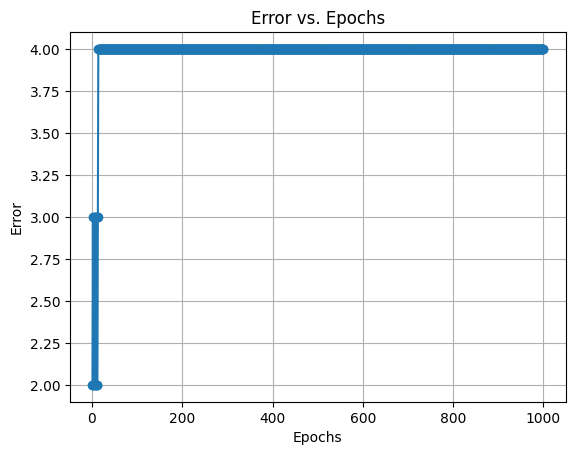

Convergence not reached after 1000 epochs.


In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(epoch_errors) + 1), epoch_errors, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.grid(True)
plt.show()
if sse > thr:
    print("Convergence not reached after", ietr, "epochs.")
else:
    print("Convergence reached in", j + 1, "epochs.")

Bi-Polar Step did not converge after 1000 iterations
Sigmoid did not converge after 1000 iterations
ReLU did not converge after 1000 iterations


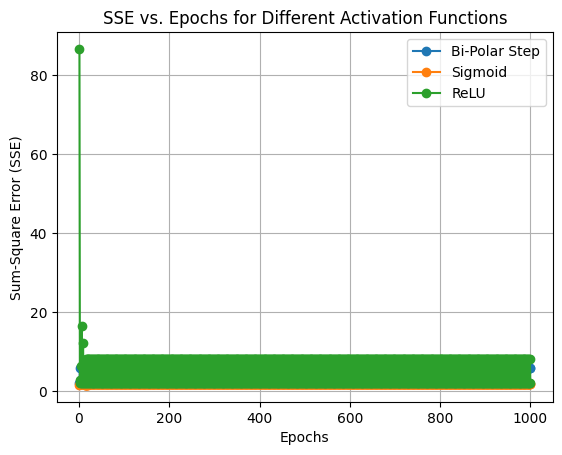

In [ ]:
activation_functions = {
    "Bi-Polar Step": bipolar_step,
    "Sigmoid": sigmoid,
    "ReLU": relu
}

for activation_name, activation_func in activation_functions.items():
    w=np.array([10,0.2])
    b=-0.75
    epoch_errors = []  # Store SSE values after each epoch
    convergence_achieved = False

    for epoch in range(1000):
        sse = 0

        for i in range(len(inp)):
            actual = out2[i]
            sum1 = np.dot(w, inp[i]) + b
            pred = activation_func(sum1)
            err = actual - pred
            sse += err**2

            for k in range(2):
                w[k] += err * inp[i][k] * alpha
            b += err * alpha

        epoch_errors.append(sse)

        if sse <= thr:
          convergence_achieved = True
          print(f"{activation_name} converged at iteration {epoch + 1}")
          break
    if not convergence_achieved:
        print(f"{activation_name} did not converge after 1000 iterations")

    # Plotting the SSE values against epochs for each activation function
    plt.plot(range(1, len(epoch_errors) + 1), epoch_errors, marker='o', linestyle='-', label=activation_name)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error (SSE)')
plt.title('SSE vs. Epochs for Different Activation Functions')
plt.grid(True)
plt.legend()
plt.show()


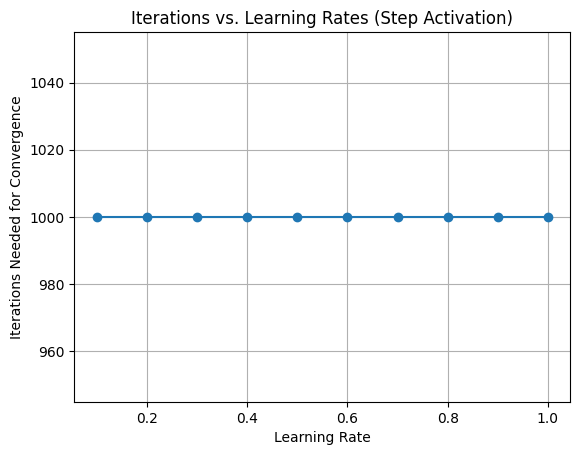

In [ ]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
error_threshold = 0.002
max_epochs = 1000

iterations_needed = []  # Store the number of iterations needed for each learning rate

for alpha in learning_rates:
    w=np.array([10,0.2])
    b=-0.75
    epoch_errors = []  # Store SSE values after each epoch
    convergence_achieved = False

    for epoch in range(max_epochs):
        sse = 0

        for i in range(len(inp)):
            actual = out2[i]
            sum1 = np.dot(w, inp[i]) + b
            pred = step(sum1)
            err = actual - pred
            sse += err**2

            for k in range(2):
                w[k] += err * inp[i][k] * alpha
            b += err * alpha

        epoch_errors.append(sse)

        if sse <= error_threshold:
            convergence_achieved = True
            iterations_needed.append(epoch + 1)
            break

    if not convergence_achieved:
        iterations_needed.append(max_epochs)

# Plotting the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed for Convergence')
plt.title('Iterations vs. Learning Rates (Step Activation)')
plt.grid(True)
plt.show()

A5

In [ ]:
import numpy as np

# Define the customer data
customer_data = np.array([
    [20, 6, 2, 386, 1],   # C_1 1-yes
    [16, 3, 6, 289, 1],   # C_2
    [27, 6, 2, 393, 1],   # C_3
    [19, 1, 2, 110, 0],   # C_4 0-no
    [24, 4, 2, 280, 1],   # C_5
    [22, 1, 5, 167, 0],   # C_6
    [15, 4, 2, 271, 1],   # C_7
    [18, 4, 2, 274, 1],   # C_8
    [21, 1, 4, 148, 0],   # C_9
    [16, 2, 4, 198, 0]    # C_10
])

# Extract features (input) and labels (output)
X = customer_data[:, :-1]
y = customer_data[:, -1]

# Initialize weights and bias
np.random.seed(0)
weights = np.random.rand(X.shape[1])
bias = np.random.rand()

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the learning rate
learning_rate = 0.1

# Training the perceptron
max_epochs = 1000
for epoch in range(max_epochs):
    error = 0
    for i in range(len(X)):
        # Compute the weighted sum of inputs
        weighted_sum = np.dot(X[i], weights) + bias

        # Apply the sigmoid activation function
        predicted = sigmoid(weighted_sum)

        # Calculate the error
        delta = y[i] - predicted

        # Update weights and bias
        weights += learning_rate * delta * X[i]
        bias += learning_rate * delta

        error += delta**2

    # Calculate the mean squared error
    mse = error / len(X)

    # Check for convergence
    if mse < 0.002:
        print(f"Converged after {epoch + 1} epochs with MSE: {mse:.4f}")
        break

# Make predictions for the dataset
predictions = []
for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias
    predicted = sigmoid(weighted_sum)
    if predicted >= 0.5:
        predictions.append("Yes")
    else:
        predictions.append("No")

# Print the predictions for each customer
for i in range(len(customer_data)):
    print(f"Customer C_{i+1}: Actual High Value Tx? - {customer_data[i][-1]}, Predicted - {predictions[i]}")


Converged after 328 epochs with MSE: 0.0009
Customer C_1: Actual High Value Tx? - 1, Predicted - Yes
Customer C_2: Actual High Value Tx? - 1, Predicted - Yes
Customer C_3: Actual High Value Tx? - 1, Predicted - Yes
Customer C_4: Actual High Value Tx? - 0, Predicted - No
Customer C_5: Actual High Value Tx? - 1, Predicted - No
Customer C_6: Actual High Value Tx? - 0, Predicted - No
Customer C_7: Actual High Value Tx? - 1, Predicted - Yes
Customer C_8: Actual High Value Tx? - 1, Predicted - Yes
Customer C_9: Actual High Value Tx? - 0, Predicted - No
Customer C_10: Actual High Value Tx? - 0, Predicted - No


<ipython-input-20-66bb9ad80acd>:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


A6

In [ ]:
import numpy as np

# Define the customer data
customer_data = np.array([
    [20, 6, 2, 386, 1],   # C_1
    [16, 3, 6, 289, 1],   # C_2
    [27, 6, 2, 393, 1],   # C_3
    [19, 1, 2, 110, 0],   # C_4
    [24, 4, 2, 280, 1],   # C_5
    [22, 1, 5, 167, 0],   # C_6
    [15, 4, 2, 271, 1],   # C_7
    [18, 4, 2, 274, 1],   # C_8
    [21, 1, 4, 148, 0],   # C_9
    [16, 2, 4, 198, 0]    # C_10
])

# Extract features (input) and labels (output)
X = customer_data[:, :-1]
y = customer_data[:, -1]

# Add a bias term to the features
X_bias = np.column_stack((np.ones(X.shape[0]), X))

# Initialize the weights for the perceptron
np.random.seed(0)
perceptron_weights = np.random.rand(X_bias.shape[1])

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Train the perceptron using the perceptron learning algorithm
learning_rate = 0.1
max_epochs = 1000

for epoch in range(max_epochs):
    error = 0
    for i in range(len(X_bias)):
        weighted_sum = np.dot(X_bias[i], perceptron_weights)
        predicted = sigmoid(weighted_sum)
        delta = y[i] - predicted
        perceptron_weights += learning_rate * delta * X_bias[i]
        error += delta**2

    mse = error / len(X_bias)
    if mse < 0.002:
        break

# Calculate predictions using the perceptron
perceptron_predictions = []
for i in range(len(X_bias)):
    weighted_sum = np.dot(X_bias[i], perceptron_weights)
    predicted = sigmoid(weighted_sum)
    if predicted >= 0.5:
        perceptron_predictions.append(1)
    else:
        perceptron_predictions.append(0)

# Compute accuracy for the perceptron
perceptron_accuracy = np.mean(perceptron_predictions == y)

# Calculate predictions using matrix pseudo-inverse
weights = np.linalg.pinv(X_bias) @ y
pseudo_inverse_predictions = np.round(sigmoid(X_bias @ weights))

# Compute accuracy for matrix pseudo-inverse
pseudo_inverse_accuracy = np.mean(pseudo_inverse_predictions == y)

# Print the results
print(f"Perceptron Accuracy: {perceptron_accuracy * 100:.2f}%")
print(f"Matrix Pseudo-Inverse Accuracy: {pseudo_inverse_accuracy * 100:.2f}%")


Perceptron Accuracy: 100.00%
Matrix Pseudo-Inverse Accuracy: 60.00%


<ipython-input-21-5aef069703de>:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


A7

In [ ]:

import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



def sigmoid_der(x):
    return x * (1 - x)



learning_rate = 0.05



inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])



ip_n = 2
hn_n = 4
op_n = 1



itrns = 1000
np.random.seed(0)
weights_ip_hn = np.random.uniform(size=(ip_n, hn_n))
biases_hn = np.random.uniform(size=(1, hn_n))
weights_hn_op = np.random.uniform(size=(hn_n, op_n))
biases_op = np.random.uniform(size=(1, op_n))



for i in range(itrns):
    hn_l_ip = np.dot(inputs, weights_ip_hn) + biases_hn
    hn_l_op = sigmoid(hn_l_ip)
    op_l_ip = np.dot(hn_l_op, weights_hn_op) + biases_op
    op_l_op = sigmoid(op_l_ip)

    error = targets - op_l_op

    if np.max(np.abs(error)) <= 0.002:
        print(f"Converged at iteration {i}")
        break

    delta_op = error * sigmoid_der(op_l_op)
    error_hn = delta_op.dot(weights_hn_op.T)
    delta_hn = error_hn * sigmoid_der(hn_l_op)

    weights_hn_op += hn_l_op.T.dot(delta_op) * learning_rate
    biases_op += np.sum(delta_op, axis=0, keepdims=True) * learning_rate
    weights_ip_hn += inputs.T.dot(delta_hn) * learning_rate
    biases_hn += np.sum(delta_hn, axis=0, keepdims=True) * learning_rate



predicted_output = op_l_op.round()
print("Predicted Output:")
print(predicted_output)

Predicted Output:
[[0.]
 [0.]
 [0.]
 [0.]]


A8

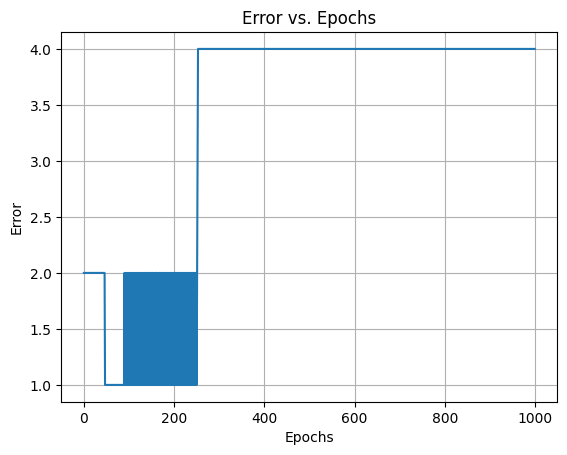

Learned Weights:
[ 0.1 -0.1 -0.1]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt



W = np.array([10, 0.2, -0.75])
learning_rate = 0.05



ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tgts = np.array([0, 1, 1, 0])



def bin_step(x):
    return 1 if x >= 0 else 0



def sum_sq_error(pred, tgts):
    return np.sum((pred - tgts) ** 2)



error_val = []
epochs = []



max_epochs = 1000
convergence_error = 0.002



for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(ip)):
        ip_data = np.insert(ip[i], 0, 1)
        net = np.dot(ip_data, W)
        pred = bin_step(net)
        error = tgts[i] - pred
        total_error += error ** 2
        W += learning_rate * error * ip_data
    error_val.append(total_error)
    epochs.append(epoch)



    if total_error <= convergence_error:
        print(f"Converged at epoch {epoch}")
        break



plt.plot(epochs, error_val)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.grid()
plt.show()



print("Learned Weights:")
print(W)

A9


In [1]:


from sklearn.neural_network import MLPClassifier

# Define the AND Gate input data (X) and labels (y)
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Create an instance of MLPClassifier
clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)

# Fit the model to the data
clf_and.fit(X_and, y_and)

# Test the trained classifier
test_data_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
predicted_output_and = clf_and.predict(test_data_and)

# Print the results
for i, input_data in enumerate(test_data_and):
    print(f"Input: {input_data}, Predicted Output: {predicted_output_and[i]}")

Input: [0, 0], Predicted Output: 0
Input: [0, 1], Predicted Output: 0
Input: [1, 0], Predicted Output: 0
Input: [1, 1], Predicted Output: 1


A10

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the AND Gate input data (X) and labels (y)
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Create an instance of MLPClassifier
clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)

# Fit the model to the data
clf_and.fit(X_and, y_and)

# Evaluate accuracy on the training data
accuracy_and = clf_and.score(X_and, y_and)

# Make predictions for the AND Gate
predictions_and = clf_and.predict(X_and)

# Print results
print("AND Gate Results:")
print("Actual:", y_and)
print("Predicted:", predictions_and)
print("Accuracy:", accuracy_and)



# Define the XOR Gate input data (X) and labels (y)
X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor = [0, 1, 1, 0]

# Create an instance of MLPClassifier
clf_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)

# Fit the model to the data
clf_xor.fit(X_xor, y_xor)

# Evaluate accuracy on the training data
accuracy_xor = clf_xor.score(X_xor, y_xor)

# Make predictions for the XOR Gate
predictions_xor = clf_xor.predict(X_xor)

# Print results
print("\nXOR Gate Results:")
print("Actual:", y_xor)
print("Predicted:", predictions_xor)
print("Accuracy:", accuracy_xor)


AND Gate Results:
Actual: [0, 0, 0, 1]
Predicted: [0 0 0 1]
Accuracy: 1.0

XOR Gate Results:
Actual: [0, 1, 1, 0]
Predicted: [0 1 0 1]
Accuracy: 0.5


A11

In [ ]:
import pandas as pd
train = pd.read_csv("/content/train (2).csv")
test = pd.read_csv("/content/test (2).csv")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
train.columns = [c.replace(' ', '_') for c in train.columns]

In [ ]:
test.columns = [c.replace(' ', '_') for c in test.columns]

In [ ]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [ ]:
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
categorical_features = ['Type_of_Travel']
numerical_features = ['Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Flight_Distance',
                       'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Cleanliness',
                       'Checkin_service', 'Inflight_service', 'Baggage_handling']

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train = pipeline.fit_transform(X_train)

# Transform the test data
X_test = pipeline.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()


clf.fit(X_train, y_train)



preds = clf.predict(X_test)

acc = accuracy_score(y_test, preds) * 100


print('Accuracy: {:.2f} %'.format(acc))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.76 %
